In [3]:
import cv2
from matplotlib import pyplot as plt
import os
import random

In [66]:
data_dir = "./data/"
img = cv2.imread(data_dir + "house.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
n, m = 3, 3

In [67]:
def resize(img, n, m):
    h, w = img.shape[0], img.shape[1] # img 높이, 넓이 알기
    while w % n != 0: # 이미지 크기 맞추기
        w -= 1

    while h % m != 0: # 이미지 크기 맞추기
        h -= 1

    img = cv2.resize(img, (w, h)) # 크기에 맞춰 resize 하기
    
    return img

In [68]:
img_resize = resize(img, n, m)
img_resize.shape

(333, 498, 3)

In [69]:
def cut_image(img, n, m):
    img_list = []
    for i in range(n):
        for j in range(m):
            img_list.append(img_resize[(img_resize.shape[0]//n)*i:(img_resize.shape[0]//n)*(i+1), (img_resize.shape[1]//m)*j:(img_resize.shape[1]//m)*(j+1)])
    
    return img_list

In [70]:
def cut_image(img, n, m):
    h, w = img.shape[0], img.shape[1]
    img_list = []
    for i in range(n): # x
        for j in range(m): # y 
                if i == 0 and j == 0: # 제일 오른쪽 위일때 
                    # img_h = img[(h//m)*i:(h//m)*(i+1)+(h//m)//2]
                    # img_w = img[(w//n)*i:(w//n)*(i+1)+(w//n)//2]
                    img_list.append(img[(h//m)*j:(h//m)*(j+1)+(h//m)//2, (w//n)*i:(w//n)*(i+1)+(w//n)//2])
                
                elif i == 0 and j+1 == m: # 제일 왼쪽 아래일 때
                    # img_h = img[(h//m)*i:(h//m)*(i+1)+(h//m)//2]
                    # img_w = img[(w//n)*i-(w//n)//2:(w//n)*(i+1)]
                    img_list.append(img[(h//m)*j:(h//m)*(j+1)+(h//m)//2, (w//n)*i:(w//n)*(i+1)+(w//n)//2])

                elif  i+1 == n and j == 0: # 제일 오른쪽 위에 있을 때
                    # img_h = img[(h//m)*i-(h//m)//2:(h//m)*(i+1)]
                    # img_w = img[(w//n)*i:(w//n)*(i+1)+(w//n)//2]
                    img_list.append(img[(h//m)*j:(h//m)*(j+1)+(h//m)//2, (w//n)*i-(w//n)//2:(w//n)*(i+1)])

                elif i+1 == n and j+1 == m: # 제일 오른쪽 아래에 있을 때
                    # img_h = img[(h//m)*i-(h//m)//2:(h//m)*(i+1)]
                    # img_w = img[(w//n)*i-(w//n)//2:(w//n)*(i+1)]
                    img_list.append(img[(h//m)*j-(h//m)//2:(h//m)*(j+1), (w//n)*i-(w//n)//2:(w//n)*(i+1)])

                else: # 그 외 
                    # img_h = img[(h//m)*i-(h//m)//4:(h//m)*(i+1)+(h//m)//4]
                    # img_w = img[(w//n)*i-(w//n)//4:(w//n)*(i+1)+(h//m)//4]
                    img_list.append(img[(h//m)*j-(h//m)//4:(h//m)*(j+1)+(h//m)//4, (w//n)*i-(w//n)//4:(w//n)*(i+1)+(h//m)//4])
    
    return img_list


In [91]:
img_list = cut_image(img_resize, n, m)
for i in img_list:
    print(i.shape)

(166, 249, 3)
(165, 0, 3)
(111, 249, 3)
(0, 234, 3)
(165, 234, 3)
(138, 234, 3)
(166, 249, 3)
(165, 207, 3)
(166, 249, 3)


In [72]:
def mirroring(img):
    img = cv2.flip(img, 1)
    return img

In [73]:
def flip(img):
    img = cv2.flip(img, 0)
    return img

In [74]:
def rotate(img):
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향으로 회전
    return img

In [75]:
def visualize(img_list):
    fig = plt.figure(figsize = (10,10))
    for i, k in enumerate(img_list):
        plt.subplot(1,len(img_list),i+1)
        plt.imshow(k)

ValueError: zero-size array to reduction operation minimum which has no identity

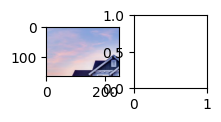

In [76]:
visualize(img_list)

In [77]:
def random_img_list(img_list):
    for i in range(len(img_list)):
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = mirroring(img_list[i])
        
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = flip(img_list[i])
        
        t_f = random.choice([0,1])
        if t_f == 1:
            img_list[i] = rotate(img_list[i])
    
    random.shuffle(img_list)

    return img_list


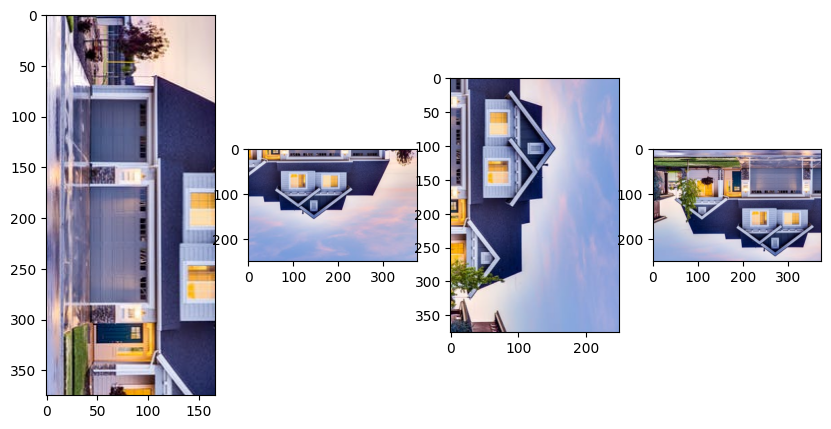

In [62]:
random_img = random_img_list(img_list)
visualize(random_img)

In [65]:
if not os.path.exists("./result"):
    os.mkdir("./result")

for i in range(n*m):
    cv2.imwrite(f"./result/{i}.jpg", cv2.cvtColor(random_img_list[i], cv2.COLOR_BGR2RGB))

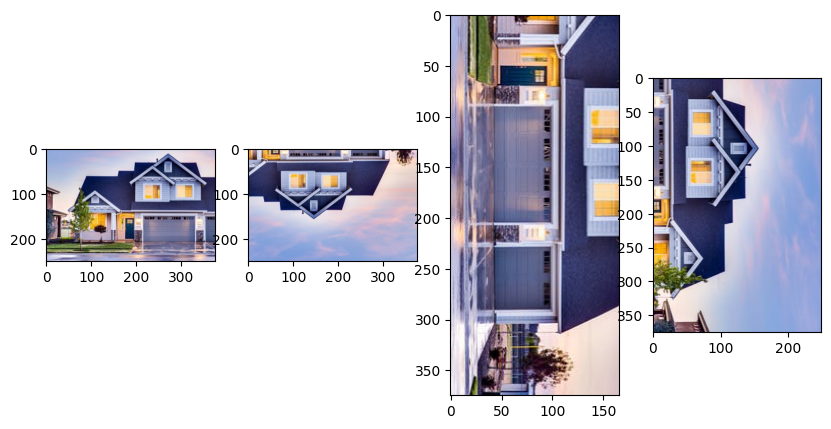

In [64]:
random_img_list = random_img_list(img_list)
visualize(random_img)